In [ ]:
import pandas as pd
df = pd.read_csv('websites.csv')
df.head(10)

,web_id,url,kind,title,text
0,1,https://alfabank.ru/,html,"Альфа-Банк - кредитные и дебетовые карты, кред...",Рассчитайте выгоду\nРасчёт калькулятора предва...
1,2,https://alfabank.ru/a-club/,html,А-Клуб. Деньги имеют значение,Брокерские услуги\nОткрытие брокерского счёта ...
2,3,https://alfabank.ru/a-club/ultimate/,html,А-Клуб. Деньги имеют значение,Хотите получить больше информации?\nПозвоните ...
3,4,https://alfabank.ru/actions/rules/,html,Скидки по картам,Правила проведения Акции «Альфа Пятница. Бараб...
4,5,https://alfabank.ru/alfafuture/,html,Альфа‑Будущее: Платформа для развития студенто...,Образование\nМагистратуры\nМагистратура ВШЭ\nМ...
5,6,https://alfabank.ru/alfafuture/blog/alfabank-l...,html,Дневник,Альфа‑Банк занял 1 место в одном из главных мо...
6,7,https://alfabank.ru/alfafuture/blog/alfatim-na...,html,Дневник,В августе во Владивостоке завершился кейс-чемп...
7,8,https://alfabank.ru/alfafuture/blog/kak-dostic...,html,Дневник,Нужно подготовиться к этому пути и задать себе...
8,9,https://alfabank.ru/alfafuture/blog/obuchenie-...,html,Дневник,Преподаватели из 35 регионов России завершили ...
9,10,https://alfabank.ru/alfafuture/blog/otkryli-la...,html,Дневник,Теперь у студентов РЭУ им. Г. В. Плеханова ест...


from matplotlib import pyplot as plt
_df_0['web_id'].plot(kind='hist', bins=20, title='web_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.12/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  plt.savefig(
/usr/local/lib/python3.12/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('title').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.12/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  plt.savefig(
/usr/local/lib/python3.12/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['web_id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'web_id'}, axis=1)
              .sort_values('web_id', ascending=True))
  xs = counted['web_id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('web_id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('title')):
  _plot_series(series, series_name, i)
  fig.legend(title='title', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('web_id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_3['web_id'].plot(kind='line', figsize=(8, 4), title='web_id')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

/usr/local/lib/python3.12/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  plt.savefig(
/usr/local/lib/python3.12/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_4['title'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_4, x='web_id', y='title', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

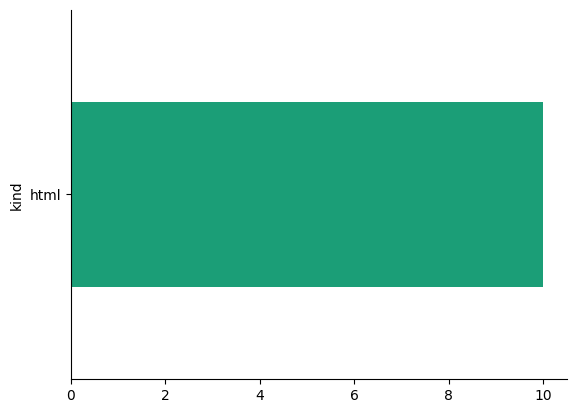

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup
import re
from nltk.tokenize import sent_tokenize
from langchain.text_splitter import RecursiveCharacterTextSplitter
from sklearn.model_selection import train_test_split

# ============================================================
# 0. Предварительная очистка, фильтрация и аномалии
# ============================================================

def clean_dataset(df: pd.DataFrame):
    df = df.copy()

    # Убираем null
    df["text"] = df["text"].fillna("")
    df["title"] = df["title"].fillna("")

    # Вычисляем длину
    df["text_len"] = df["text"].str.len()

    # Фильтр 1 — пустые
    df = df[df["text_len"] > 20]

    # Фильтр 2 — слишком большие HTML (часто мусор)
    df = df[df["text_len"] < 150_000]

    # Фильтр 3 — удаляем дубликаты текста
    df = df.drop_duplicates(subset=["text"])

    df = df.reset_index(drop=True)
    return df


# ============================================================
# 1. Очистка HTML и нормализация текста
# ============================================================

def html_to_clean_text(html: str) -> str:
    if not isinstance(html, str) or len(html.strip()) == 0:
        return ""

    soup = BeautifulSoup(html, "html.parser")

    # Удаляем мусор
    for tag in soup(["script", "style", "noscript", "header", "footer"]):
        tag.decompose()

    # Извлекаем текст
    text = soup.get_text(separator="\n")

    # Нормализация
    text = re.sub(r"\n{2,}", "\n", text)
    text = re.sub(r"[ \t]+", " ", text)
    text = text.strip()

    return text


# ============================================================
# 2. Извлечение лучшего возможного title
# ============================================================

def extract_best_title(html: str, fallback_title: str) -> str:
    if not isinstance(html, str):
        return fallback_title

    soup = BeautifulSoup(html, "html.parser")

    # 1) h1 приоритет
    h1 = soup.find("h1")
    if h1:
        return h1.get_text(strip=True)

    # 2) h2
    h2 = soup.find("h2")
    if h2:
        return h2.get_text(strip=True)

    # 3) <title> тега
    if soup.title:
        return soup.title.get_text(strip=True)

    return fallback_title if isinstance(fallback_title, str) else ""


# ============================================================
# 3. Семантическое + структурное разбиение HTML
# ============================================================

def semantic_structural_chunks(html: str, chunk_size=800, overlap=150):
    """
    1. Парсим <h1,h2,h3,p,li>
    2. Разбиваем на предложения
    3. Чанкуем до нужного размера
    """
    if not isinstance(html, str) or len(html) < 10:
        return []

    soup = BeautifulSoup(html, "html.parser")

    # 1. Структурные блоки
    blocks = []
    for tag in soup.find_all(["h1", "h2", "h3", "p", "li"]):
        text = tag.get_text(" ", strip=True)
        if text and len(text) > 1:
            blocks.append(text)

    # 2. Превращение в предложения
    sentences = []
    for block in blocks:
        try:
            sents = sent_tokenize(block)
        except:
            sents = [block]
        sentences.extend(sents)

    full_text = "\n".join(sentences)

    # 3. Основной сплиттер
    splitter = RecursiveCharacterTextSplitter(
        chunk_size=chunk_size,
        chunk_overlap=overlap,
        separators=[". ", "\n\n", "\n", " "],
    )

    chunks = splitter.split_text(full_text)

    # fallback: если все плохо — возвращаем сырой текст
    if len(chunks) == 0:
        chunks = [full_text]

    return chunks


# ============================================================
# 4. Главная функция предобработки
# ============================================================

def preprocess_df(df: pd.DataFrame):
    df = clean_dataset(df)
    df = df.copy()

    df["clean_text"] = df["text"].apply(html_to_clean_text)
    df["title_clean"] = df.apply(lambda r: extract_best_title(r["text"], r["title"]), axis=1)

    return df


# ============================================================
# 5. Чанкинг с параметрами
# ============================================================

def chunk_texts(df: pd.DataFrame, chunk_size=800, chunk_overlap=150):
    rows = []

    for _, row in df.iterrows():
        chunks = semantic_structural_chunks(
            row["text"],
            chunk_size=chunk_size,
            overlap=chunk_overlap
        )

        for i, chunk in enumerate(chunks):
            rows.append({
                "web_id": row["web_id"],
                "url": row["url"],
                "title": row["title_clean"],
                "chunk_id": f"{row['web_id']}_{i}",
                "chunk_order": i,
                "chunk_text": chunk.strip(),
            })

    return pd.DataFrame(rows)


# ============================================================
# 6. Полный pipeline
# ============================================================

def full_rag_preprocessing(df, chunk_size=800, chunk_overlap=150):
    # 1. Очистка данных
    df_clean = preprocess_df(df)

    # 2. Деление на train/test
    df_train, df_test = train_test_split(
        df_clean,
        test_size=0.30,     # 30%
        random_state=42,    # фиксируем для воспроизводимости
        shuffle=True
    )

    # 3. Чанкование отдельно
    df_train_chunks = chunk_texts(df_train, chunk_size=chunk_size, chunk_overlap=chunk_overlap)
    df_test_chunks  = chunk_texts(df_test,  chunk_size=chunk_size, chunk_overlap=chunk_overlap)

    return df_train_chunks, df_test_chunks


# ============================================================
# 7. Пример использования
# ============================================================

if __name__ == "__main__":
    df = pd.read_csv("websites.csv")

    train_chunks, test_chunks = full_rag_preprocessing(
        df,
        chunk_size=200,
        chunk_overlap=20
    )

    train_chunks.to_parquet("rag_train.parquet", index=False)
    test_chunks.to_parquet("rag_test.parquet", index=False)

    print("Train:", train_chunks.shape)
    print("Test:", test_chunks.shape)


Train: (1334, 6)
Test: (572, 6)


In [ ]:
df_chunks.head(5)

,web_id,url,title,chunk_id,chunk_order,chunk_text
0,1,https://alfabank.ru/,"Альфа-Банк - кредитные и дебетовые карты, кред...",1_0,0,
1,2,https://alfabank.ru/a-club/,А-Клуб. Деньги имеют значение,2_0,0,
2,3,https://alfabank.ru/a-club/ultimate/,А-Клуб. Деньги имеют значение,3_0,0,
3,4,https://alfabank.ru/actions/rules/,Скидки по картам,4_0,0,
4,5,https://alfabank.ru/alfafuture/,Альфа‑Будущее: Платформа для развития студенто...,5_0,0,
